In [115]:
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.rcParams['axes.facecolor'] = 'white'

In [49]:
path = './data/post_dtw.csv'
df = pd.read_csv(path, index_col=0)
df.head(10)


,Age dependency ratio (% of working-age population),Agricultural land (sq. km),Consumer price index (2010 = 100),"Death rate, crude (per 1,000 people)",Exports of goods and services (current US$),"Fertility rate, total (births per woman)",GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",Permanent cropland (% of land area),Population density (people per sq. km of land area),Urban population (% of total population)
Albania,308.302391,2.337422,465.804061,36.610812,1.394703e+10,11.842077,16997.935575,201.258709,1.525567e+05,417.634003,139.862397,22.047945,618.015439,264.852766
Algeria,354.796453,0.945357,503.369444,28.276952,2.370662e+11,17.735980,18885.596780,123.290860,1.326097e+07,402.394366,201.811794,1.821301,78.702040,351.498098
Armenia,287.691742,2.937274,466.262664,51.117134,1.236248e+10,10.509444,14016.921527,168.600265,1.585143e+05,399.914288,165.854756,10.420544,603.060084,359.604103
Australia,277.400278,3.127191,493.465018,37.329747,1.051590e+12,10.197600,224063.868789,330.858351,4.278022e+07,446.389199,33.814494,0.224765,14.978429,473.619385
Austria,268.565975,1.931224,513.147921,53.903061,8.970999e+11,7.988723,213519.761851,318.146770,4.597050e+05,439.742560,32.351661,4.733148,554.164197,331.918920
Azerbaijan,290.467966,3.144501,466.696158,34.011910,1.033587e+11,11.812378,21525.839583,225.978486,4.611772e+05,381.991098,365.191416,17.026918,573.289373,295.907467
"Bahamas, The",286.113077,0.072859,515.925237,34.233463,1.899975e+10,11.736870,144945.461867,249.180285,5.573332e+04,400.867231,95.372585,2.085975,180.372026,455.698710
Bahrain,227.753541,0.663136,520.270572,15.180408,1.001875e+11,15.010213,97498.428480,299.312696,4.100390e+03,417.527457,76.424473,22.713095,7363.380103,493.141591
Bangladesh,367.465166,4.021754,520.313424,39.656580,1.129551e+11,17.095129,4537.890534,38.273554,7.247559e+05,371.107412,474.810983,27.854370,5805.721620,153.779809
Barbados,279.392318,2.093960,489.268559,44.931636,9.116557e+09,9.552269,74751.984589,280.830283,2.394139e+03,430.716317,85.094594,12.948289,3562.369507,186.845572


# Categorize data

In [107]:
eco = [   # economical
             'GDP per capita (current US$)', # gut
             'Consumer price index (2010 = 100)', # gut
             'Exports of goods and services (current US$)']


demo = [             'Mortality rate, under-5 (per 1,000 live births)',
             'Life expectancy at birth, total (years)',
             'Age dependency ratio (% of working-age population)',
             'Fertility rate, total (births per woman)',
             'Death rate, crude (per 1,000 people)',
       'Individuals using the Internet (% of population)',]

geo = [             'Land area (sq. km)',
             'Agricultural land (sq. km)',
             'Urban population (% of total population)',
             'Population density (people per sq. km of land area)',
             'Permanent cropland (% of land area)']

In [63]:
def normalize_data(data, n_type='max'):
    data_scaled = normalize(data, axis = 0, norm = n_type) # axis 0 because we want to normalized features!!! 
    return data_scaled

def frame_data(data, cols, indices):
    return pd.DataFrame(data, columns = cols, index= indices)

In [108]:
eco_df = df.loc[:, eco]
demo_df = df.loc[:, demo]
geo_df = df.loc[:, geo]

categorized_dfs = [eco_df, demo_df, geo_df]
categorized_dfs = [frame_data(normalize_data(df), df.columns, df.index) for df in categorized_dfs]

In [64]:
indices = list(df.columns)
countries = list(df.index)


In [65]:
df_norm = frame_data(normalize_data(df), indices, countries)
df_norm.head(10)

,Age dependency ratio (% of working-age population),Agricultural land (sq. km),Consumer price index (2010 = 100),"Death rate, crude (per 1,000 people)",Exports of goods and services (current US$),"Fertility rate, total (births per woman)",GDP per capita (current US$),Individuals using the Internet (% of population),Land area (sq. km),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",Permanent cropland (% of land area),Population density (people per sq. km of land area),Urban population (% of total population)
Albania,0.518299,0.498691,0.398398,0.317405,0.001594,0.282676,0.046860,0.496969,0.001673,0.918156,0.120556,0.184546,0.017174,0.475690
Algeria,0.596462,0.201693,0.430528,0.245153,0.027091,0.423366,0.052064,0.304443,0.145401,0.884652,0.173953,0.015245,0.002187,0.631309
Armenia,0.483650,0.626671,0.398790,0.443171,0.001413,0.250865,0.038642,0.416326,0.001738,0.879200,0.142960,0.087222,0.016759,0.645868
Australia,0.466349,0.667190,0.422056,0.323638,0.120172,0.243421,0.617704,0.816991,0.469066,0.981373,0.029147,0.001881,0.000416,0.850646
Austria,0.451497,0.412029,0.438891,0.467324,0.102518,0.190694,0.588635,0.785602,0.005040,0.966761,0.027886,0.039617,0.015400,0.596144
Azerbaijan,0.488317,0.670883,0.399161,0.294873,0.011811,0.281967,0.059343,0.558010,0.005057,0.839796,0.314780,0.142519,0.015931,0.531465
"Bahamas, The",0.480996,0.015544,0.441266,0.296794,0.002171,0.280164,0.399588,0.615302,0.000611,0.881295,0.082207,0.017460,0.005012,0.818459
Bahrain,0.382885,0.141481,0.444983,0.131610,0.011449,0.358301,0.268786,0.739095,0.000045,0.917922,0.065875,0.190114,0.204626,0.885708
Bangladesh,0.617760,0.858045,0.445020,0.343811,0.012908,0.408068,0.012510,0.094509,0.007947,0.815869,0.409267,0.233147,0.161339,0.276197
Barbados,0.469697,0.446749,0.418467,0.389544,0.001042,0.228017,0.206078,0.693456,0.000026,0.946917,0.073348,0.108380,0.098997,0.335585


# PCA

In [128]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(df_norm)

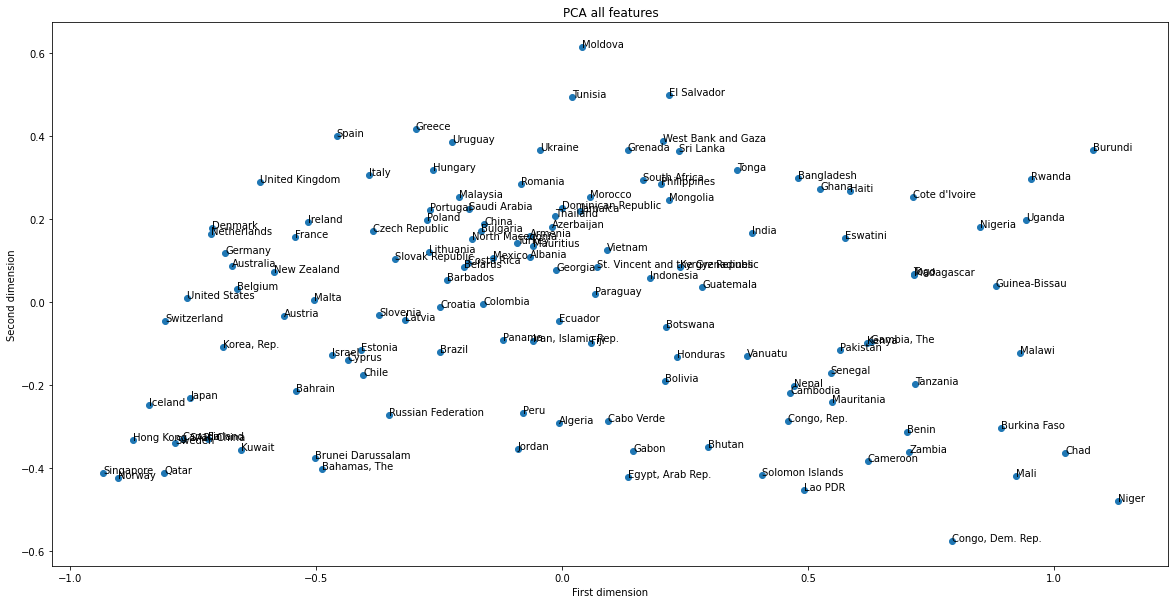

In [129]:
plt.figure(figsize=(20,10))
plt.scatter(pca_x[:,0], pca_x[:,1])
plt.title('PCA all features')
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
for i, txt in enumerate(countries):
    plt.annotate(txt, xy=(pca_x[i,0], pca_x[i,1]))
plt.savefig(fname='./pca_only.png', format = 'png', dpi=300)

# TSNE

In [130]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_x = tsne.fit_transform(df_norm)

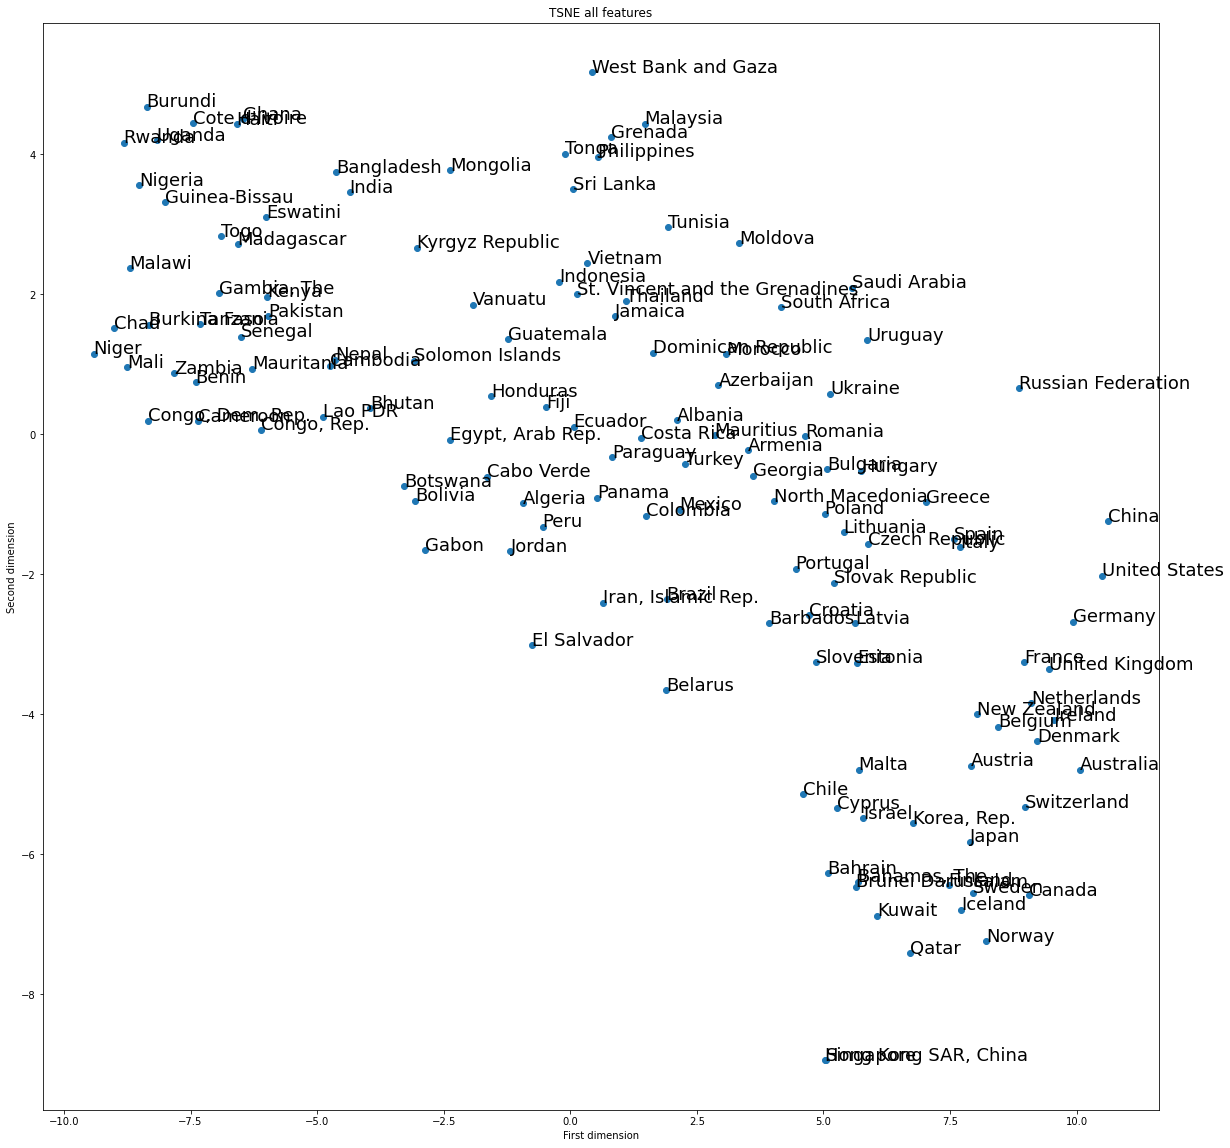

In [131]:
plt.figure(figsize=(20,20))

plt.scatter(tsne_x[:,0], tsne_x[:,1])
plt.title('TSNE all features')
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
for x, txt in enumerate(countries):
    plt.annotate(txt, xy=(tsne_x[x,0], tsne_x[x,1]), fontsize=18)
                 
plt.savefig(fname='./tsne_only.png', format = 'png', dpi=300)

# TSNE over pca

In [132]:
pca = PCA()
pca_x = pca.fit(df_norm)



In [133]:
total = 0
for idx, value in enumerate(pca_x.explained_variance_ratio_):
    total += value
    print(idx+1, '=', total)


1 = 0.5128073605287206
2 = 0.6446110715556083
3 = 0.7511282536350452
4 = 0.8105292343960349
5 = 0.8607148478158099
6 = 0.8997860101237004
7 = 0.9293546912975373
8 = 0.9571661328381905
9 = 0.970495187542617
10 = 0.9807546834741002
11 = 0.9893732405865923
12 = 0.9967901556462462
13 = 0.998760633652249
14 = 1.0


In [72]:
# 10 komponentów wyjaśnia pca w 99%

In [134]:
pca_transformed = pca_x.transform(df_norm)
first_10 = pca_transformed[:, :10]
first_10.shape

(132, 10)

In [135]:
tsne = TSNE()
tsne_x = tsne.fit_transform(first_10)

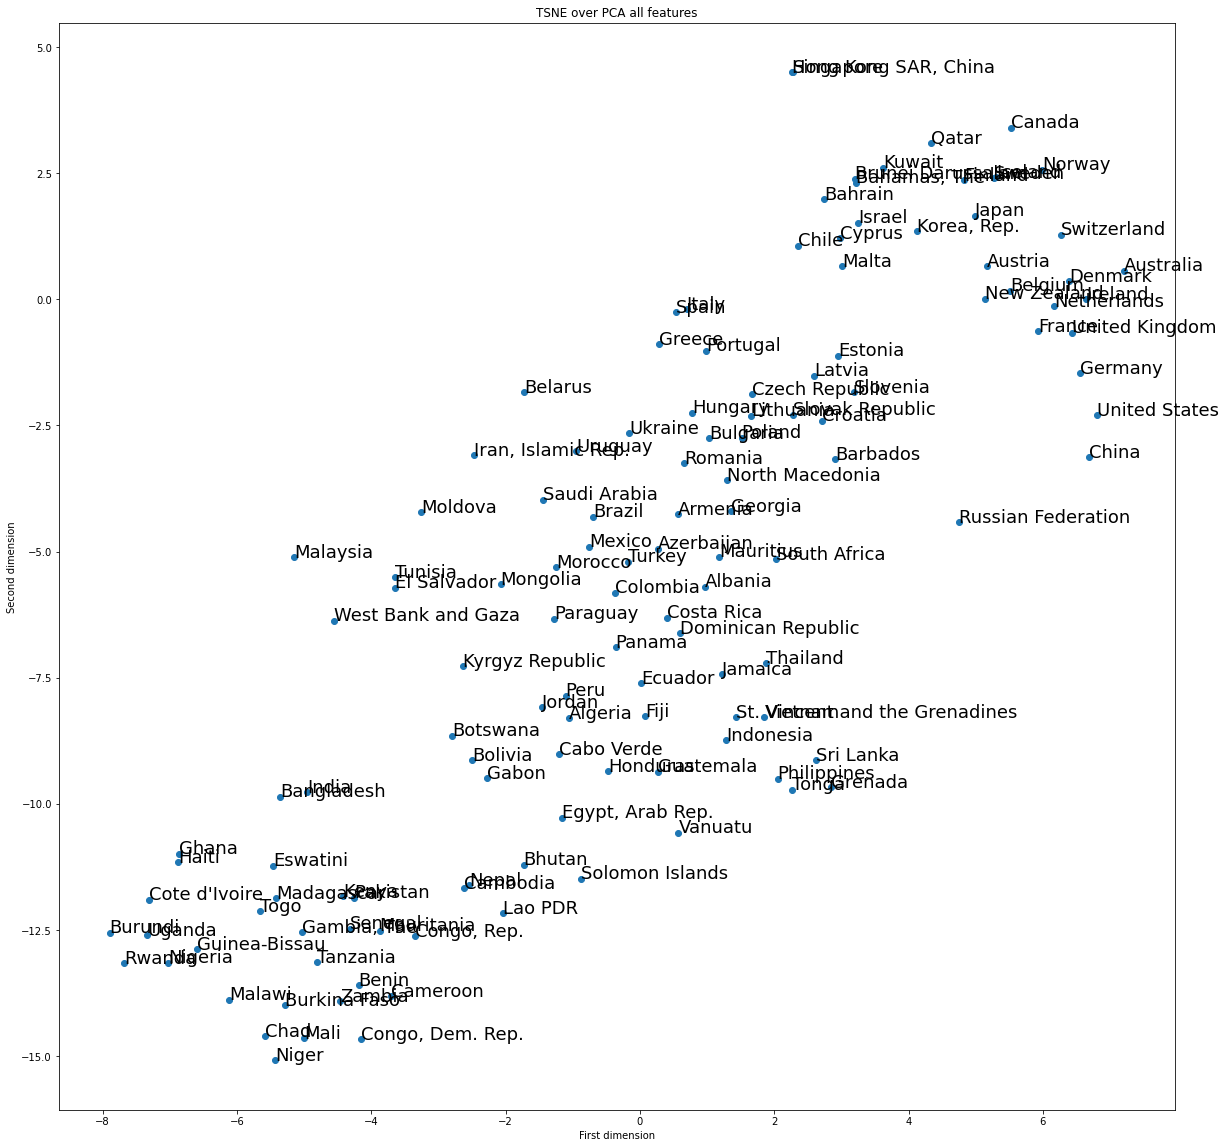

In [136]:
plt.figure(figsize=(20,20))

plt.title('TSNE over PCA all features')
plt.xlabel('First dimension')
plt.ylabel('Second dimension')
plt.scatter(tsne_x[:,0], tsne_x[:,1])
for x, txt in enumerate(countries):
    plt.annotate(txt, xy=(tsne_x[x,0], tsne_x[x,1]), fontsize=18)
    
plt.savefig(fname='./pca_then_tsne_only.png', format = 'png', dpi=300)

# categorized PCA

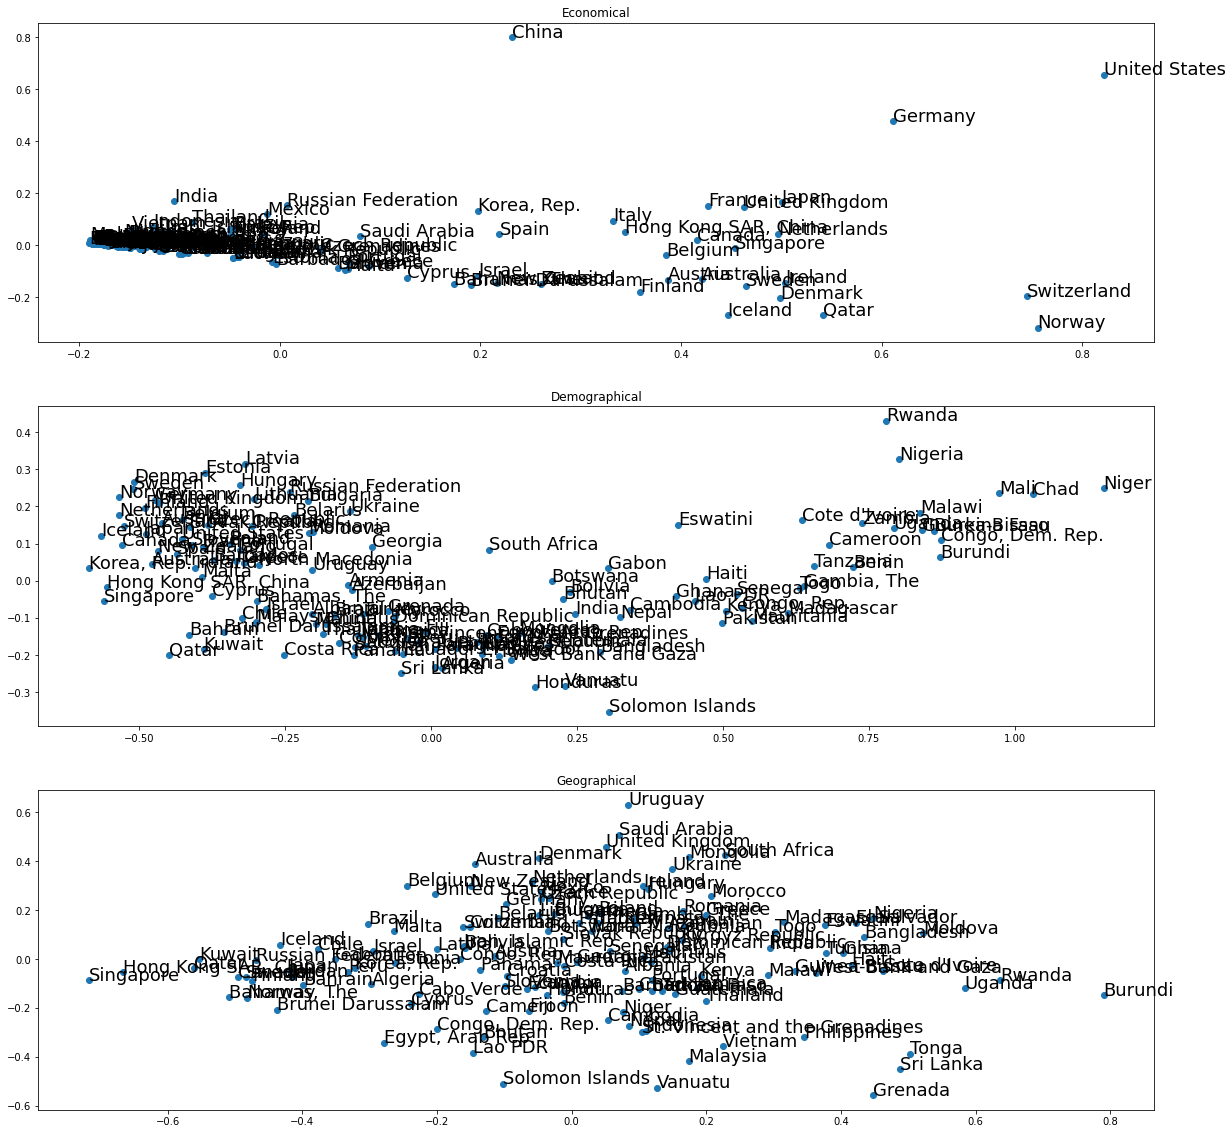

In [106]:
fig, axs = plt.subplots(len(categorized_dfs), figsize=(20, 20)) 
titles = ['Economical', 'Demographical', 'Geographical']

for idx, category in enumerate(categorized_dfs):
    pca = PCA(n_components=2)
    pca_x = pca.fit_transform(category)
    axs[idx].scatter(pca_x[:,0], pca_x[:,1])
    axs[idx].set_title(titles[idx])
    for x, txt in enumerate(countries):
        axs[idx].annotate(txt, xy=(pca_x[x,0], pca_x[x,1]), fontsize=18)
        

# categorized TSNE

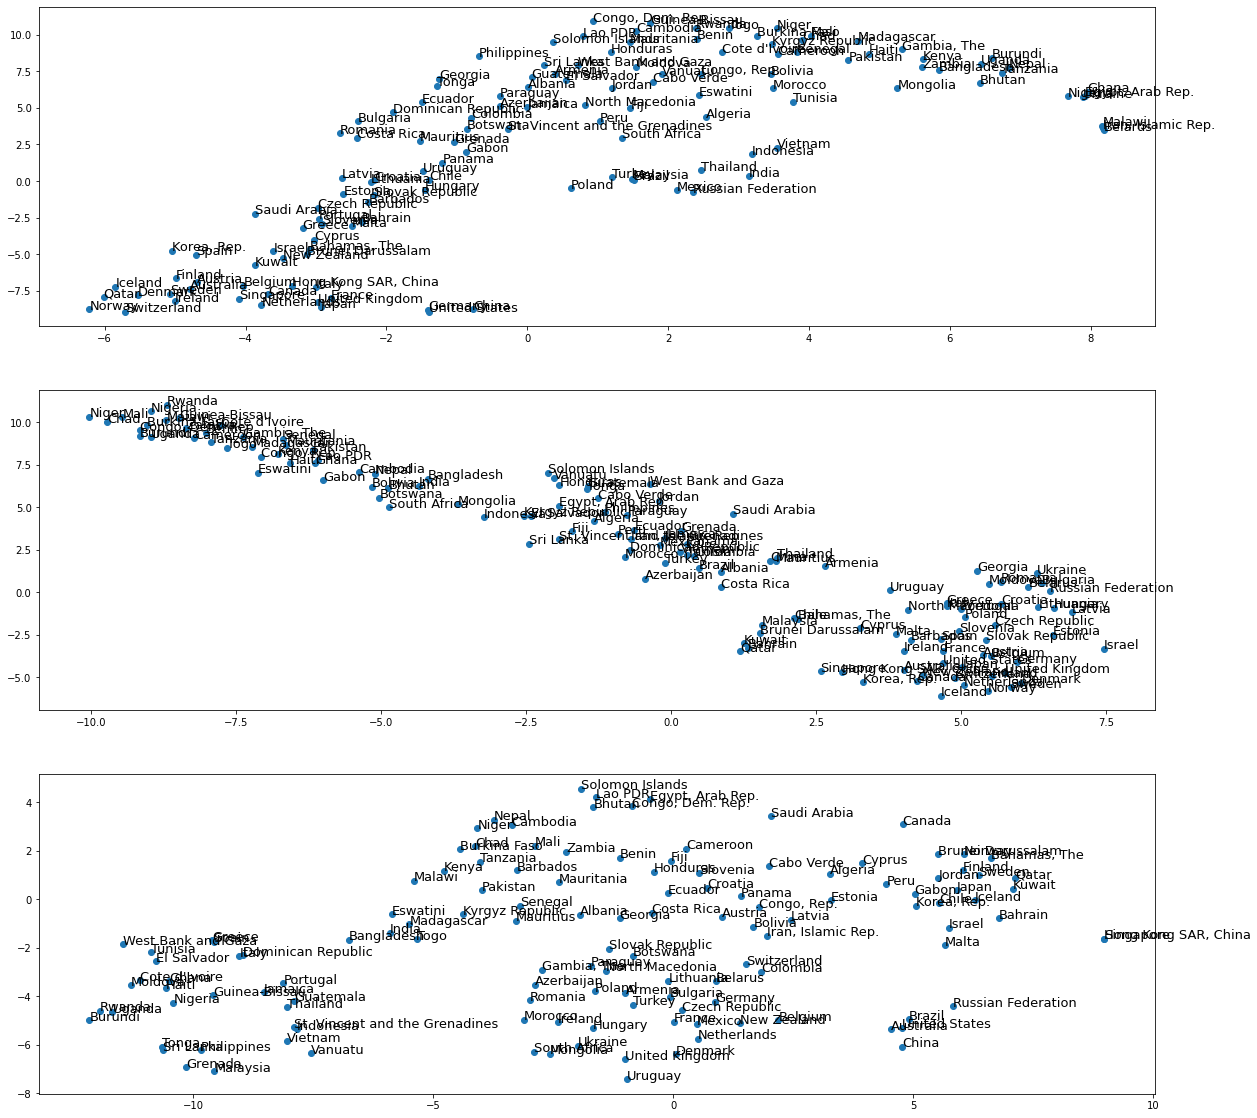

In [105]:
fig, axs = plt.subplots(len(categorized_dfs), figsize=(20, 20)) 

for idx, category in enumerate(categorized_dfs):
    pca = TSNE()
    pca_x = pca.fit_transform(category)
    axs[idx].scatter(pca_x[:,0], pca_x[:,1])
    for x, txt in enumerate(countries):
        axs[idx].annotate(txt, xy=(pca_x[x,0], pca_x[x,1]), fontsize=13)